<a href="https://colab.research.google.com/github/NikyDS/sureStartND/blob/main/Day14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('housepricedata.csv')

In [5]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
dataset = df.values

In [7]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [20]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 18ms/step - loss: 0.6910 - accuracy: 0.5532 - val_loss: 0.6818 - val_accuracy: 0.6347
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6054 - val_loss: 0.6721 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5088 - val_loss: 0.6642 - val_accuracy: 0.5251
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.5225 - val_loss: 0.6581 - val_accuracy: 0.5342
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.5351 - val_loss: 0.6526 - val_accuracy: 0.5525
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5409 - val_loss: 0.6470 - val_accuracy: 0.5708
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.5944 - val_loss: 0.6416 - val_accuracy: 0.6301
Epoch 8/100

In [22]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9132


0.913241982460022

In [26]:
import matplotlib.pyplot as plt

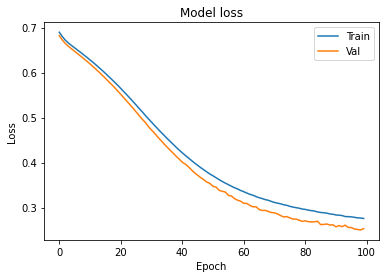

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

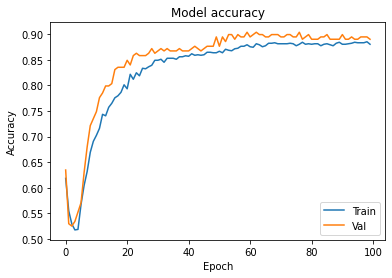

In [31]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [32]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 49ms/step - loss: 0.5458 - accuracy: 0.6967 - val_loss: 0.2947 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3272 - accuracy: 0.8509 - val_loss: 0.2708 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3378 - accuracy: 0.8751 - val_loss: 0.2706 - val_accuracy: 0.9041
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3169 - accuracy: 0.8637 - val_loss: 0.2448 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2369 - accuracy: 0.8969 - val_loss: 0.2113 - val_accuracy: 0.9224
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2318 - accuracy: 0.8965 - val_loss: 0.2270 - val_accuracy: 0.9087
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2489 - accuracy: 0.8983 - val_loss: 0.1883 - val_accuracy: 0.9087
Epoch 

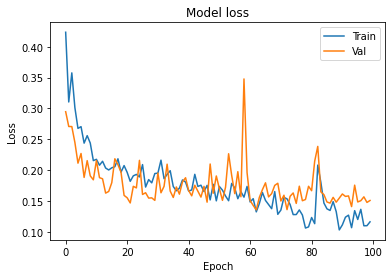

In [33]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

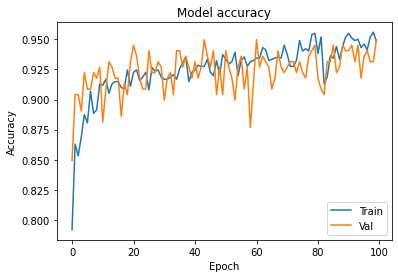

In [35]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
from keras.layers import Dropout
from keras import regularizers

In [37]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [38]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 68ms/step - loss: 21.0975 - accuracy: 0.5307 - val_loss: 3.8623 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 2.4952 - accuracy: 0.8316 - val_loss: 0.6677 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 2s 54ms/step - loss: 0.6077 - accuracy: 0.8692 - val_loss: 0.5010 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 2s 54ms/step - loss: 0.5146 - accuracy: 0.8638 - val_loss: 0.4577 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 2s 53ms/step - loss: 0.5086 - accuracy: 0.8574 - val_loss: 0.4439 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4780 - accuracy: 0.8676 - val_loss: 0.4450 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4664 - accuracy: 0.8826 - val_loss: 0.4790 - val_accuracy: 0.8950
Epoch

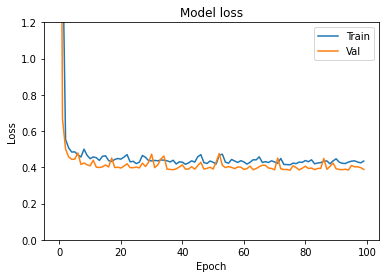

In [39]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

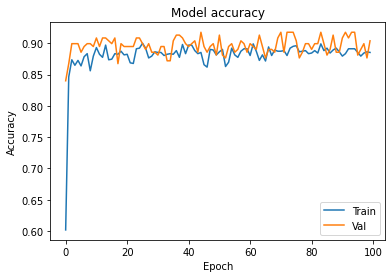

In [40]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()